<a href="https://colab.research.google.com/github/DeepthiVReddy/Bike-Sharing/blob/main/Comprehensive_Data_Cleaning%2C_Outlier_Handling%2C_and_EDA_on_Bike_Sharing_Demand_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
df = pd.read_csv('Hour.csv')

# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_summary = missing_values[missing_values > 0]

# Display the summary of missing values
print("Summary of Missing Data:")
print(missing_summary)

# Handling missing values
# If missing values are found, we apply the following technique:
# Since we are dealing with a time-based dataset (bike rental data over hours),
# we can use forward fill or backward fill methods to fill in missing values.

# Filling missing values using forward fill method as it is effective for time series data
# (assuming the previous hour's data is a reasonable approximation for the current hour).
df.fillna(method='ffill', inplace=True)

# Confirming if all missing values are handled
print("Missing Values After Filling:")
print(df.isnull().sum())


Summary of Missing Data:
dteday        523
hr            485
weathersit    480
temp          499
atemp         514
hum           531
windspeed     471
casual        481
registered    532
cnt           541
dtype: int64
Missing Values After Filling:
instant       0
dteday        2
hr            0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


<ipython-input-2-ea0470d74df2>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


<ipython-input-3-841d0f18727a>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


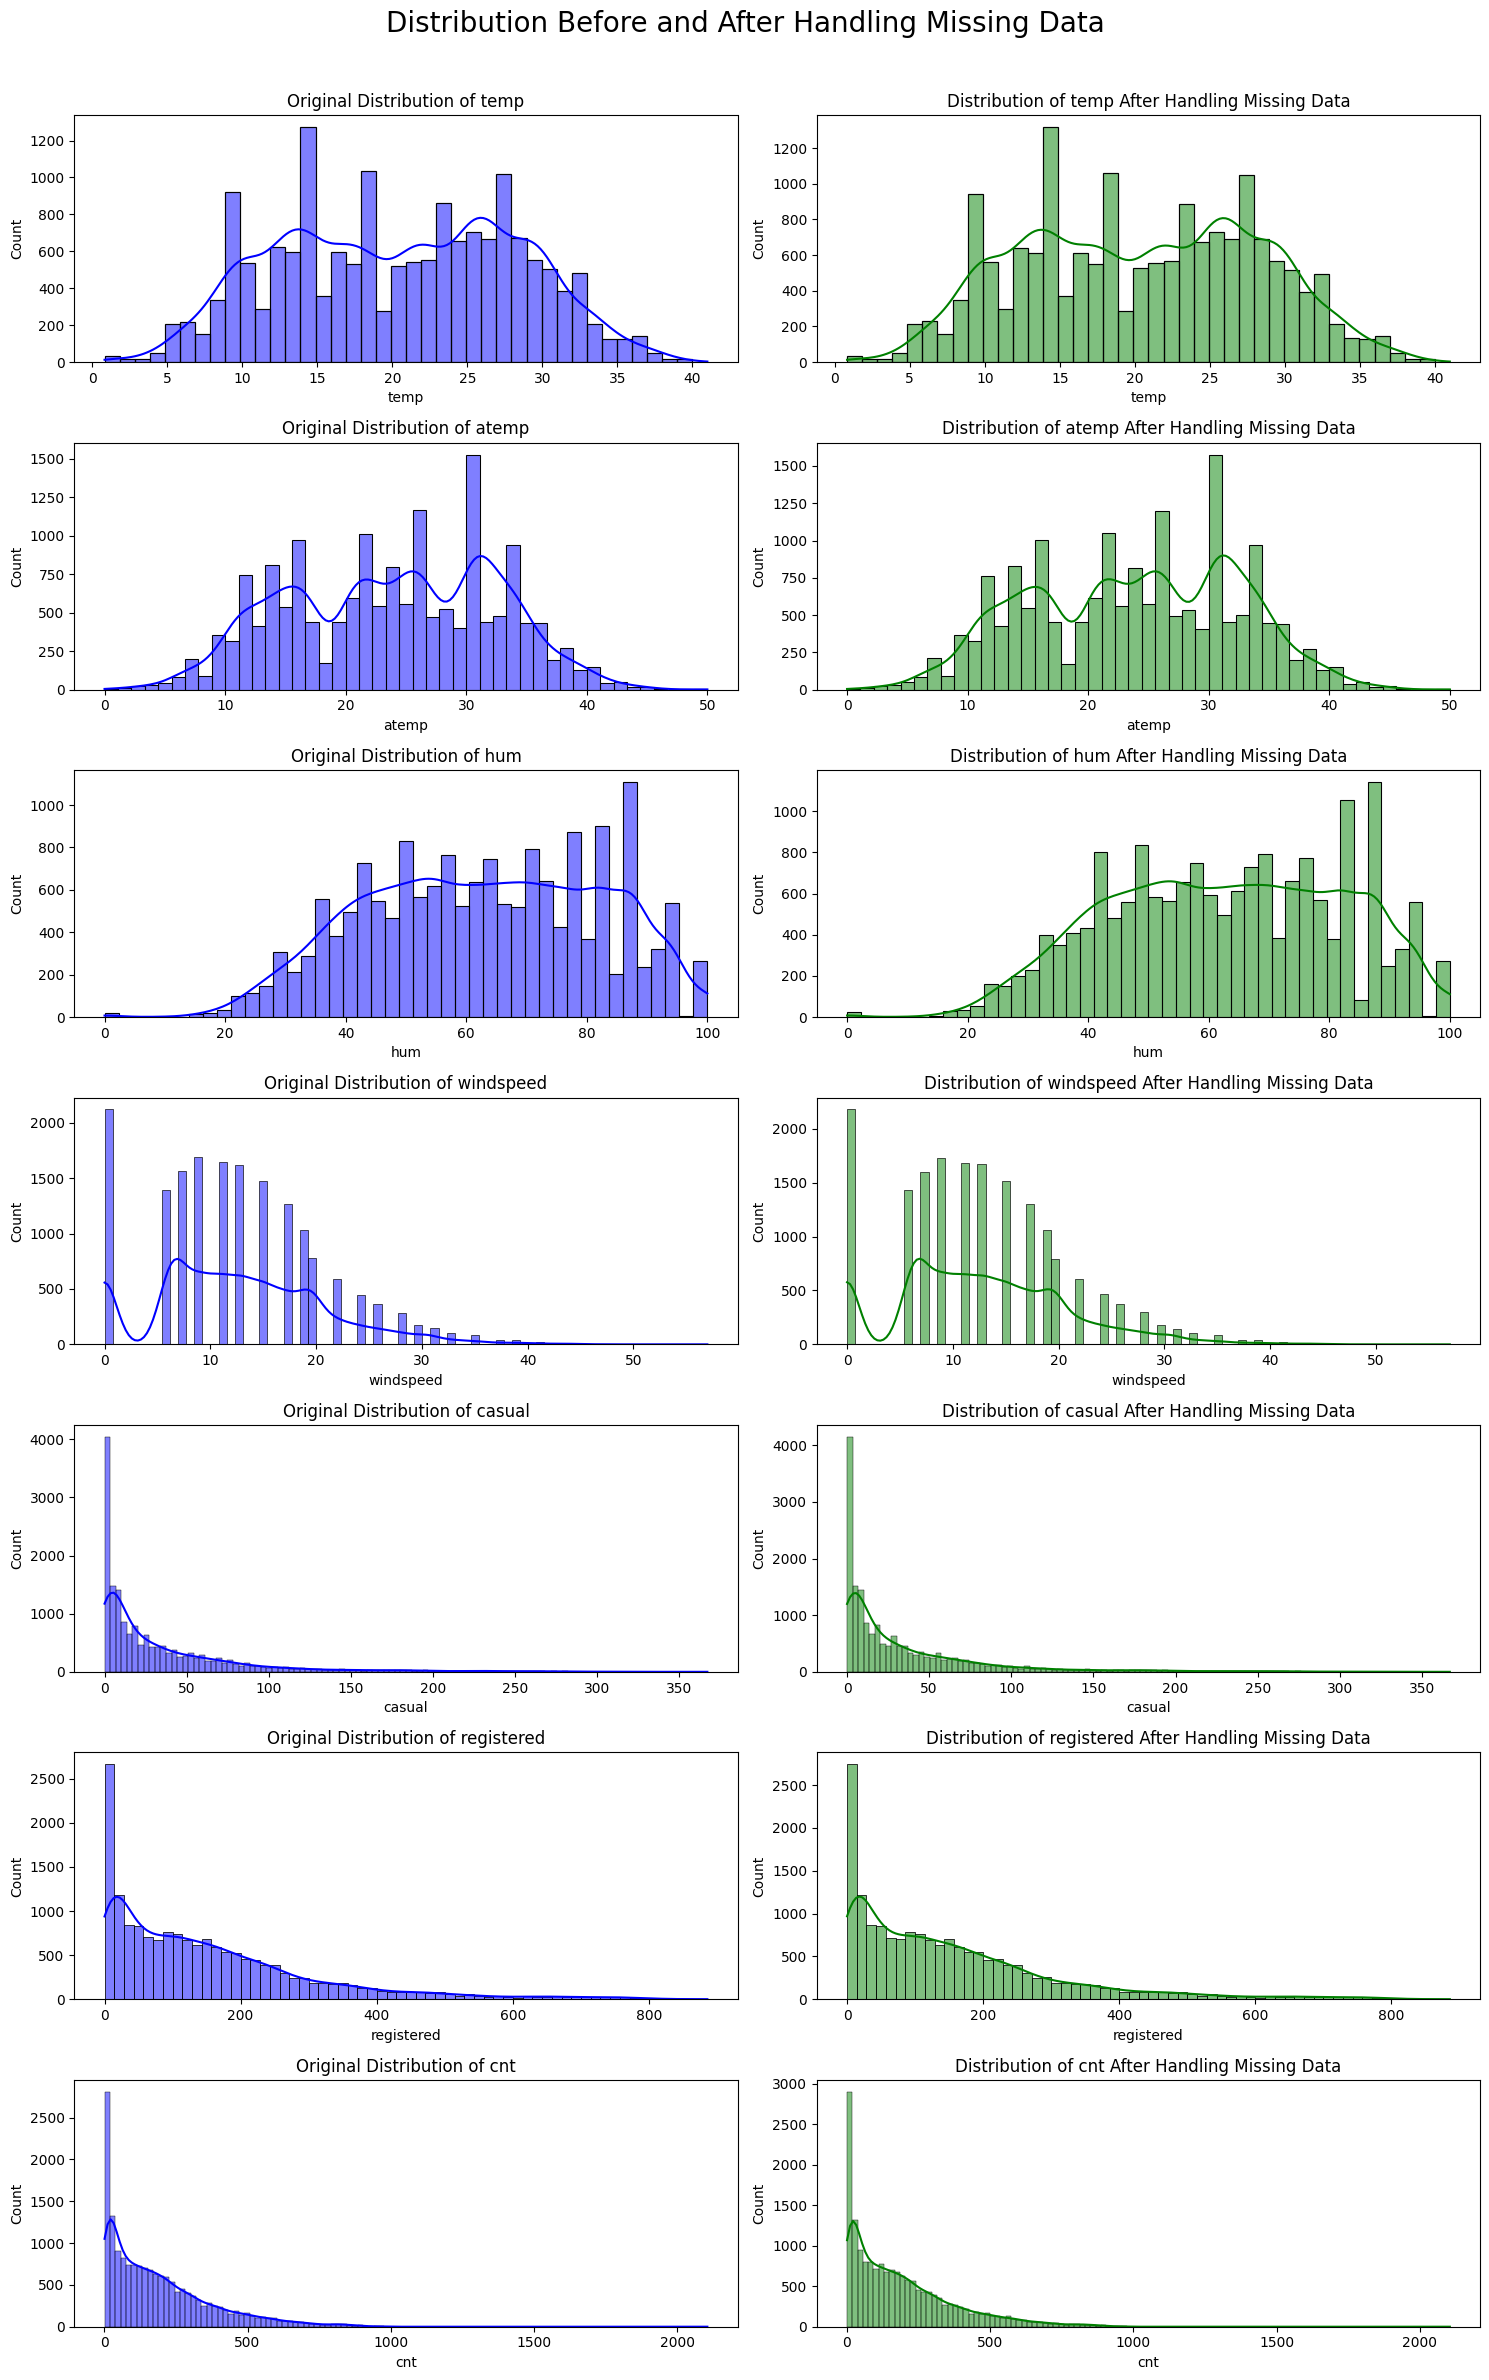

In [ ]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('Hour.csv')

# Checking for missing values in the dataset
# Creating a copy to store the original data with missing values
df_original = df.copy()

# Filling missing values using forward fill method on the original dataset
df.fillna(method='ffill', inplace=True)

# Defining the columns of interest for distribution comparison
columns_of_interest = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Plotting histograms to compare distributions before and after handling missing values
fig, axes = plt.subplots(len(columns_of_interest), 2, figsize=(15, 25))
fig.suptitle('Distribution Before and After Handling Missing Data', fontsize=20)

for i, col in enumerate(columns_of_interest):
    # Plot distribution of the original data (with missing values)
    sns.histplot(df_original[col], ax=axes[i, 0], kde=True, color='blue')
    axes[i, 0].set_title(f'Original Distribution of {col}')

    # Plot distribution after handling missing values
    sns.histplot(df[col], ax=axes[i, 1], kde=True, color='green')
    axes[i, 1].set_title(f'Distribution of {col} After Handling Missing Data')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


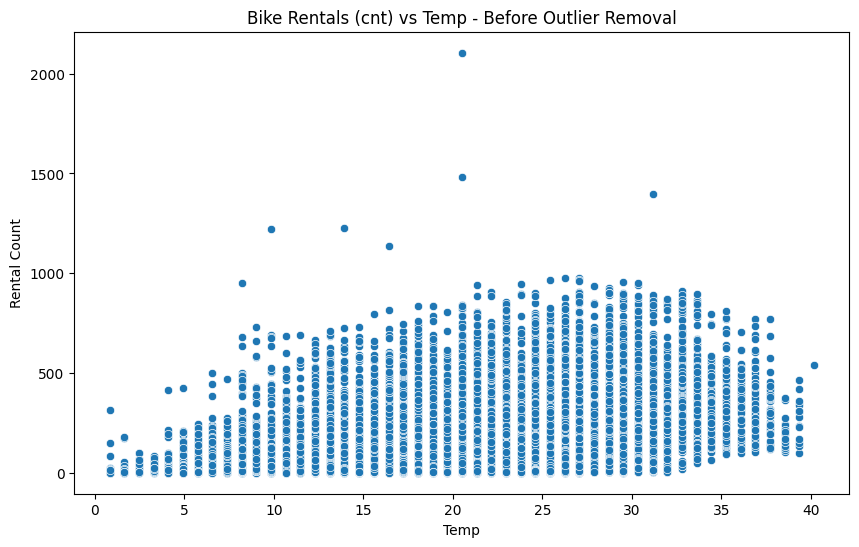

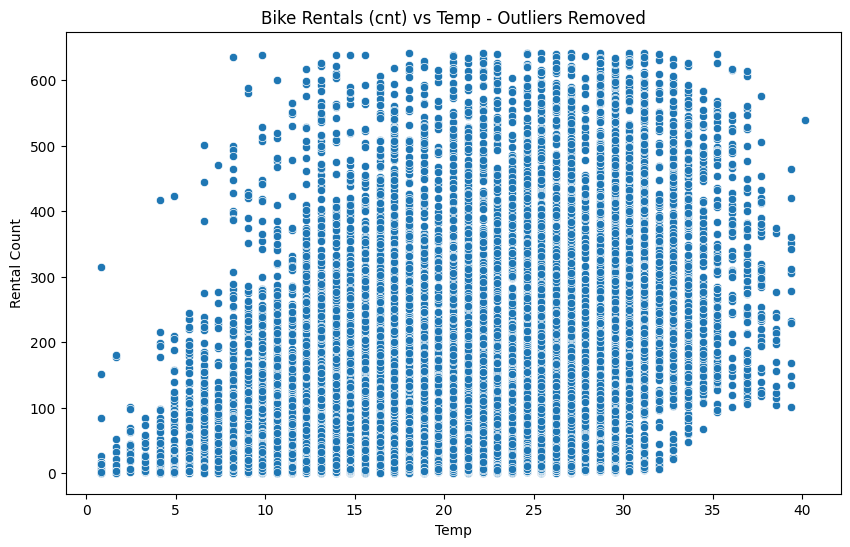

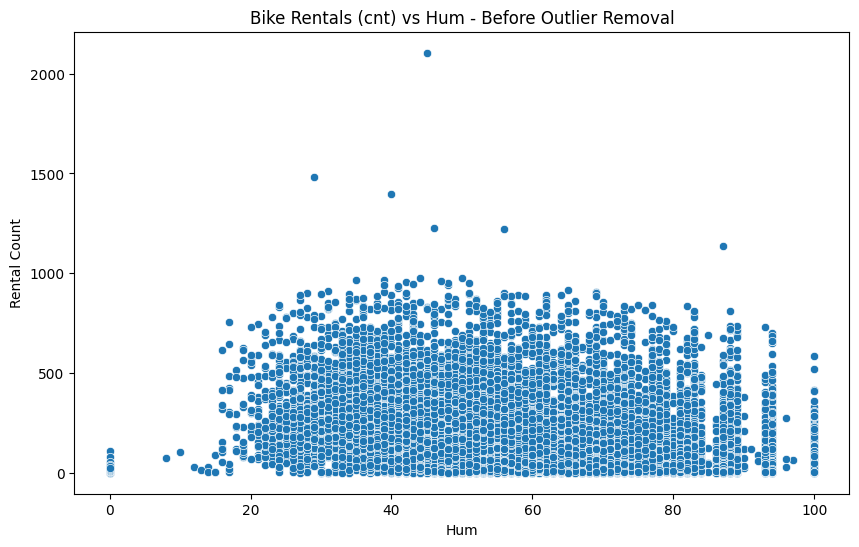

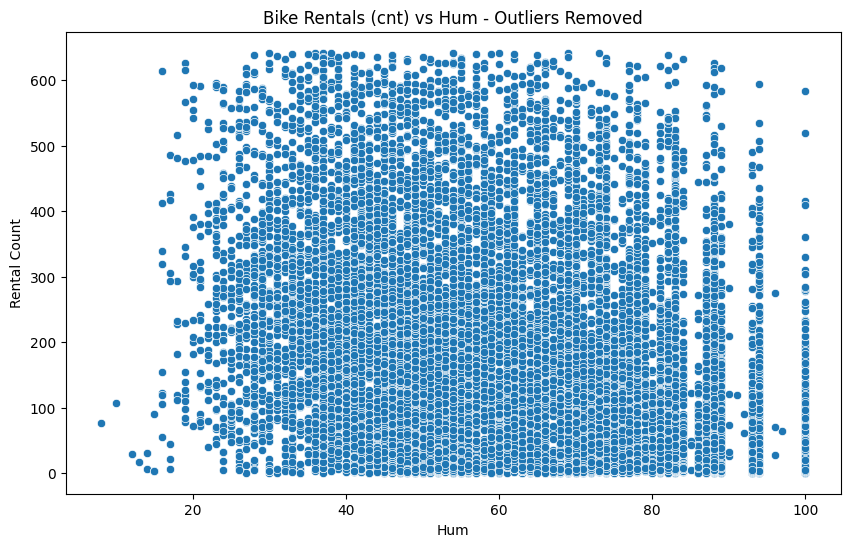

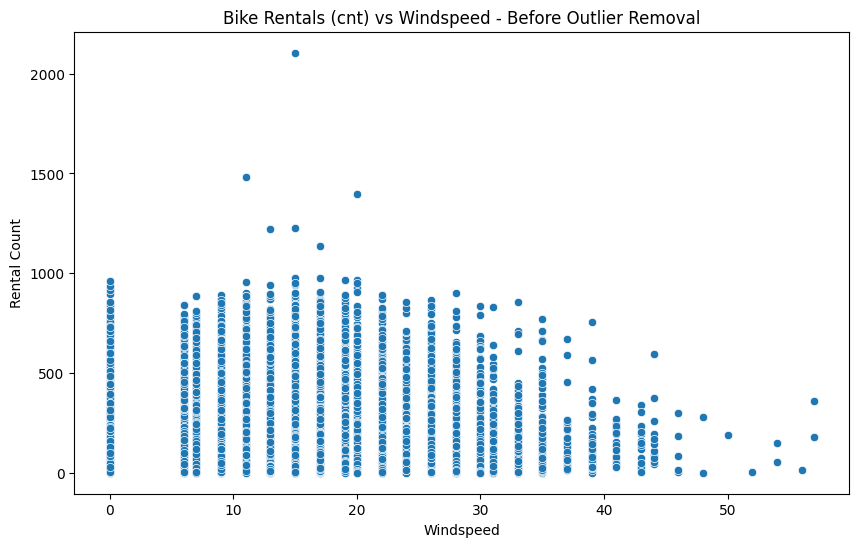

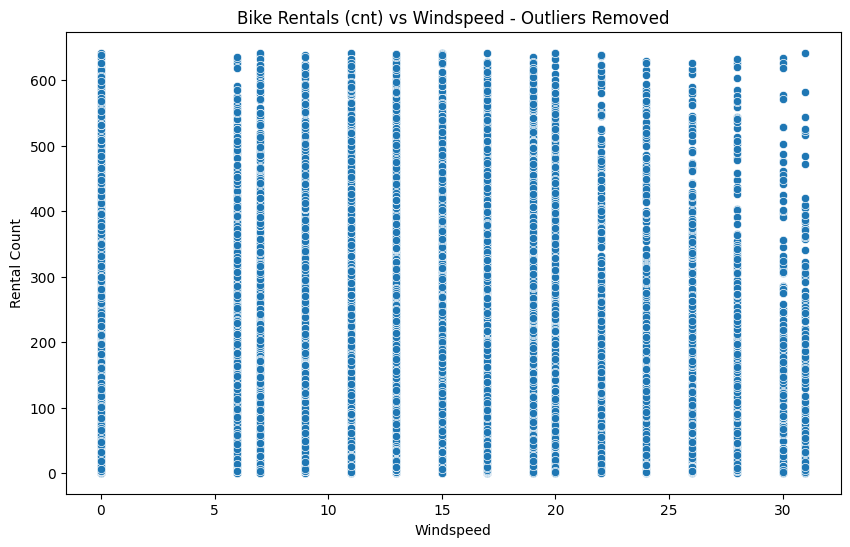

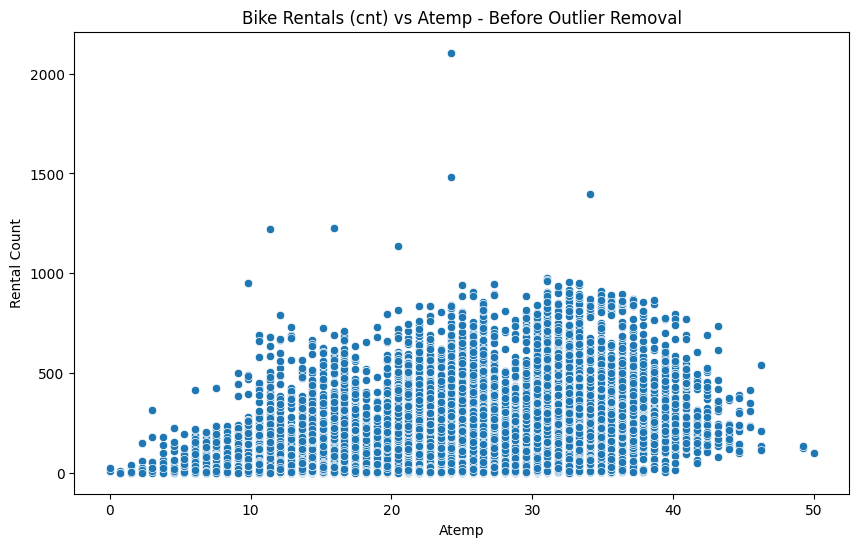

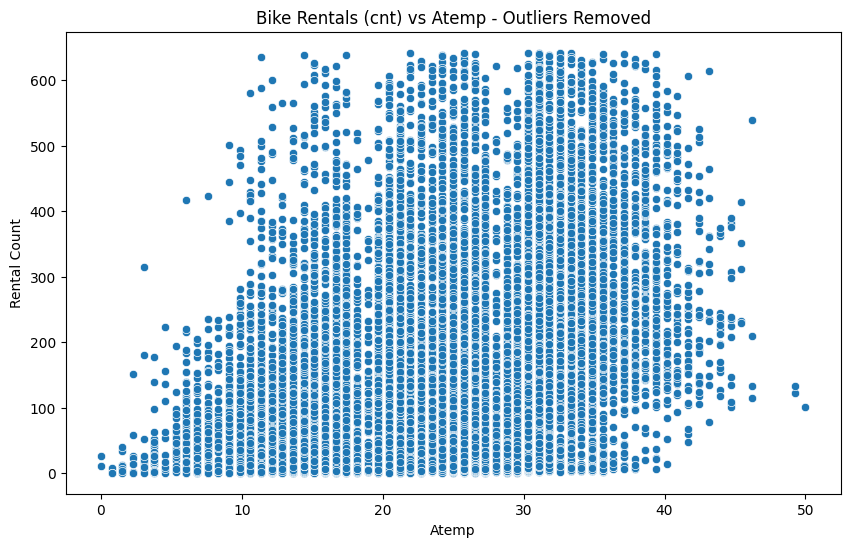

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Hour.csv')
data['dteday'] = pd.to_datetime(data['dteday'])

# Define a function to identify and remove outliers using the IQR method
def remove_outliers(df, x_var, y_var):
    # Calculate IQR for x and y variables
    Q1_x = df[x_var].quantile(0.25)
    Q3_x = df[x_var].quantile(0.75)
    IQR_x = Q3_x - Q1_x

    Q1_y = df[y_var].quantile(0.25)
    Q3_y = df[y_var].quantile(0.75)
    IQR_y = Q3_y - Q1_y

    # Define boundaries for outliers
    lower_bound_x = Q1_x - 1.5 * IQR_x
    upper_bound_x = Q3_x + 1.5 * IQR_x
    lower_bound_y = Q1_y - 1.5 * IQR_y
    upper_bound_y = Q3_y + 1.5 * IQR_y

    # Remove outliers
    filtered_df = df[(df[x_var] >= lower_bound_x) & (df[x_var] <= upper_bound_x) &
                     (df[y_var] >= lower_bound_y) & (df[y_var] <= upper_bound_y)]
    return filtered_df

# List of variables to analyze against 'cnt'
variables = ['temp', 'hum', 'windspeed', 'atemp']

for var in variables:
    # Scatter plot before outlier removal
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=var, y='cnt', data=data)
    plt.title(f"Bike Rentals (cnt) vs {var.capitalize()} - Before Outlier Removal")
    plt.xlabel(var.capitalize())
    plt.ylabel("Rental Count")
    plt.show()

    # Remove outliers using IQR method
    data_no_outliers = remove_outliers(data, var, 'cnt')

    # Scatter plot after outlier removal
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=var, y='cnt', data=data_no_outliers)
    plt.title(f"Bike Rentals (cnt) vs {var.capitalize()} - Outliers Removed")
    plt.xlabel(var.capitalize())
    plt.ylabel("Rental Count")
    plt.show()


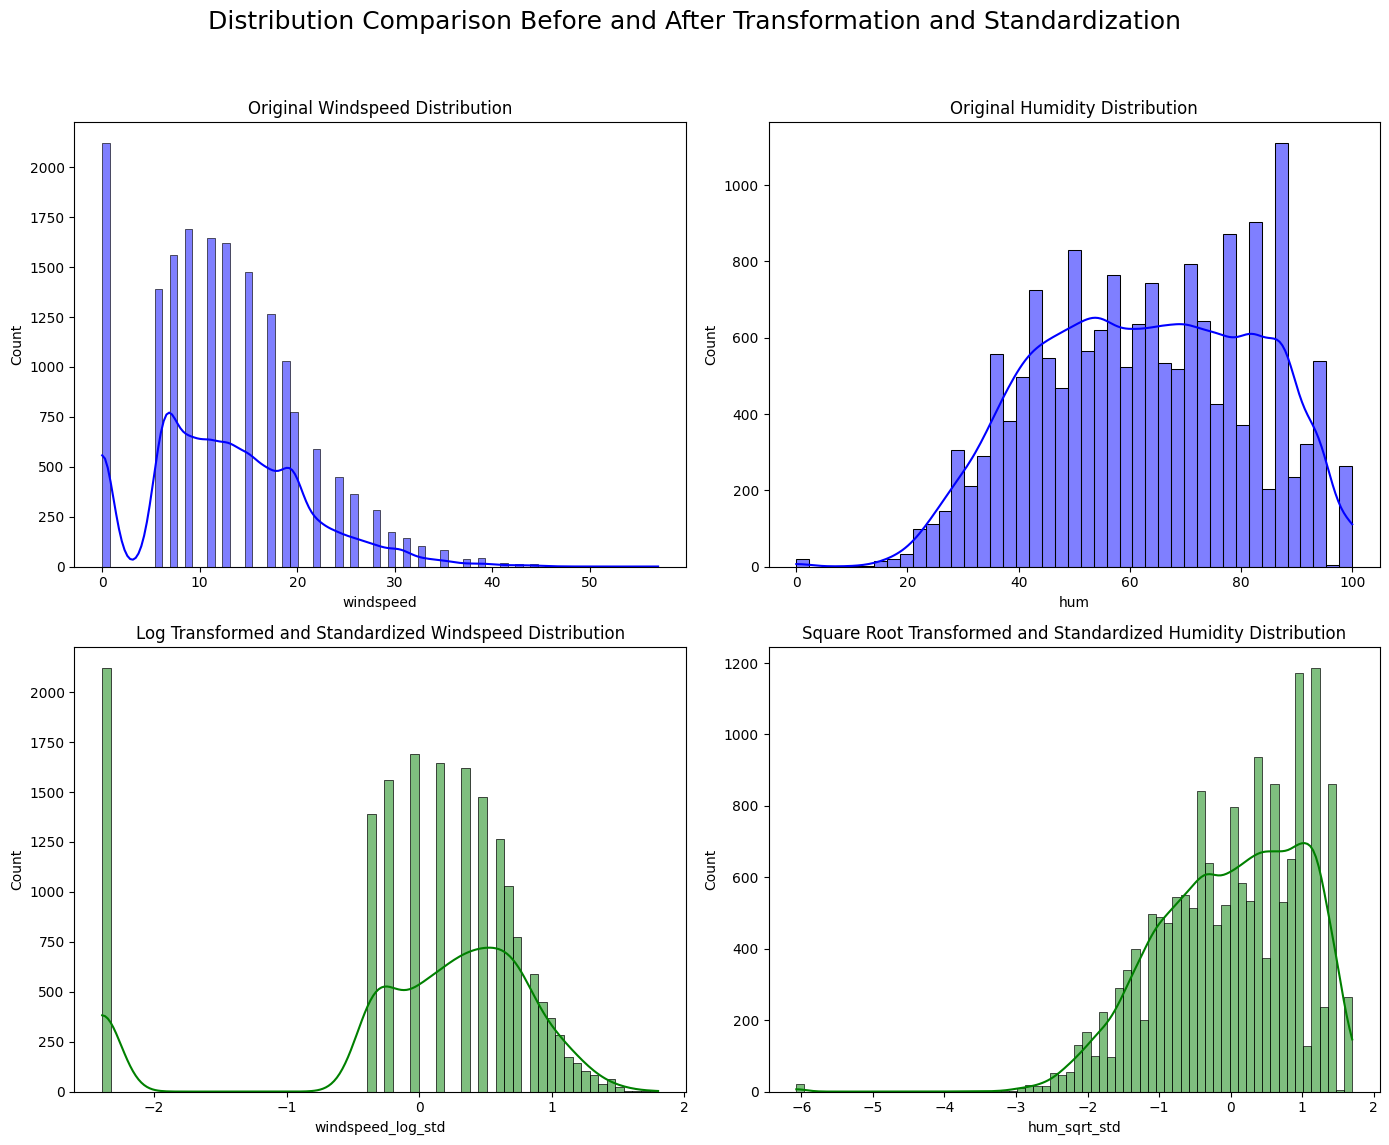

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Loading the dataset
df = pd.read_csv('Hour.csv')

# Log Transformation on windspeed (adding a small constant to avoid log(0) issues)
df['windspeed_log'] = np.log(df['windspeed'] + 1)

# Square Root Transformation on hum
df['hum_sqrt'] = np.sqrt(df['hum'])

# Standardizing the transformed variables
scaler = StandardScaler()
df[['windspeed_log_std', 'hum_sqrt_std']] = scaler.fit_transform(df[['windspeed_log', 'hum_sqrt']])

# Plotting distributions before and after transformations and standardization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Distribution Comparison Before and After Transformation and Standardization', fontsize=18)

# Original distributions
sns.histplot(df['windspeed'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Original Windspeed Distribution')
sns.histplot(df['hum'], kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Original Humidity Distribution')

# Transformed and standardized distributions
sns.histplot(df['windspeed_log_std'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Log Transformed and Standardized Windspeed Distribution')
sns.histplot(df['hum_sqrt_std'], kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Square Root Transformed and Standardized Humidity Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


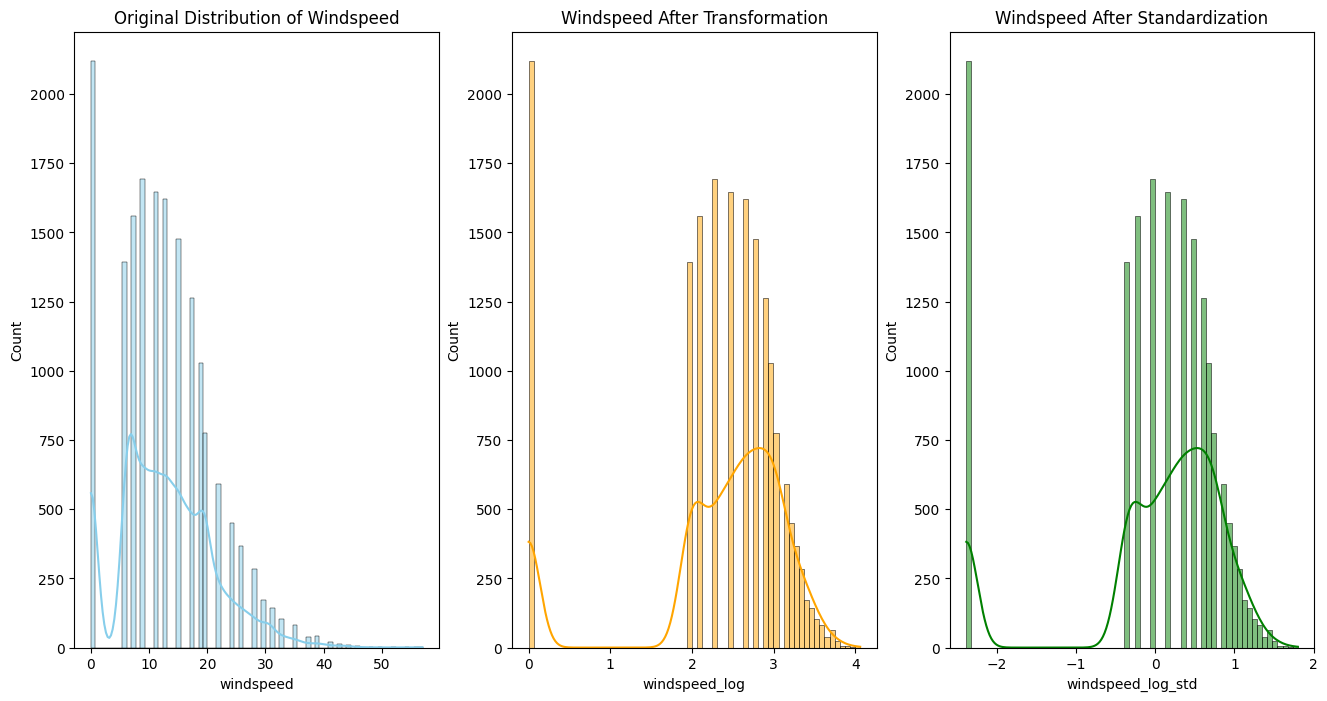

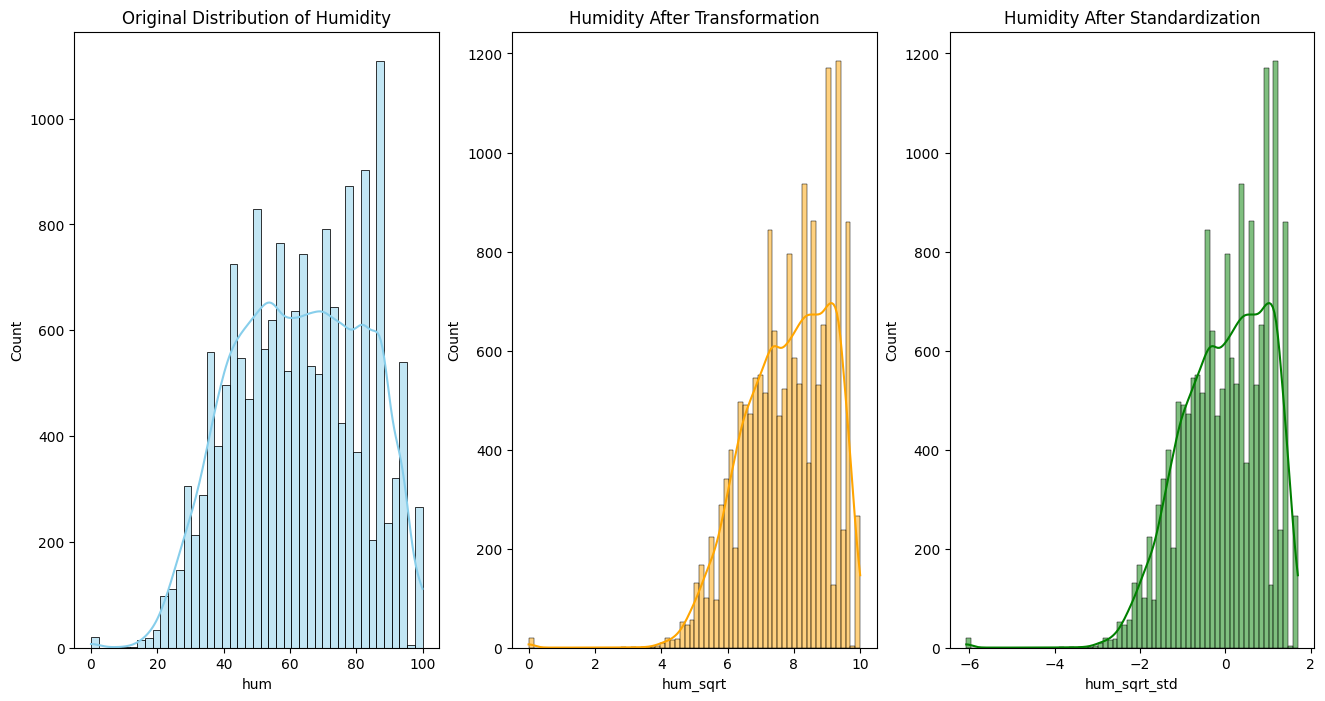

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Hour.csv')

# Log transformation for windspeed (adding 1 to avoid log(0))
df['windspeed_log'] = np.log1p(df['windspeed'])

# Square root transformation for hum
df['hum_sqrt'] = np.sqrt(df['hum'])

# Standardize the transformed columns
scaler = StandardScaler()
df[['windspeed_log_std', 'hum_sqrt_std']] = scaler.fit_transform(df[['windspeed_log', 'hum_sqrt']])

# Plot the distributions before and after transformation and standardization
def plot_distributions(df, original_col, transformed_col, standardized_col, title):
    plt.figure(figsize=(16, 8))

    # Original distribution
    plt.subplot(1, 3, 1)
    sns.histplot(df[original_col], kde=True, color='skyblue')
    plt.title(f'Original Distribution of {title}')

    # Transformed distribution
    plt.subplot(1, 3, 2)
    sns.histplot(df[transformed_col], kde=True, color='orange')
    plt.title(f'{title} After Transformation')

    # Standardized distribution
    plt.subplot(1, 3, 3)
    sns.histplot(df[standardized_col], kde=True, color='green')
    plt.title(f'{title} After Standardization')

    plt.show()

# Plot distributions for windspeed
plot_distributions(df, 'windspeed', 'windspeed_log', 'windspeed_log_std', 'Windspeed')

# Plot distributions for humidity (hum)
plot_distributions(df, 'hum', 'hum_sqrt', 'hum_sqrt_std', 'Humidity')



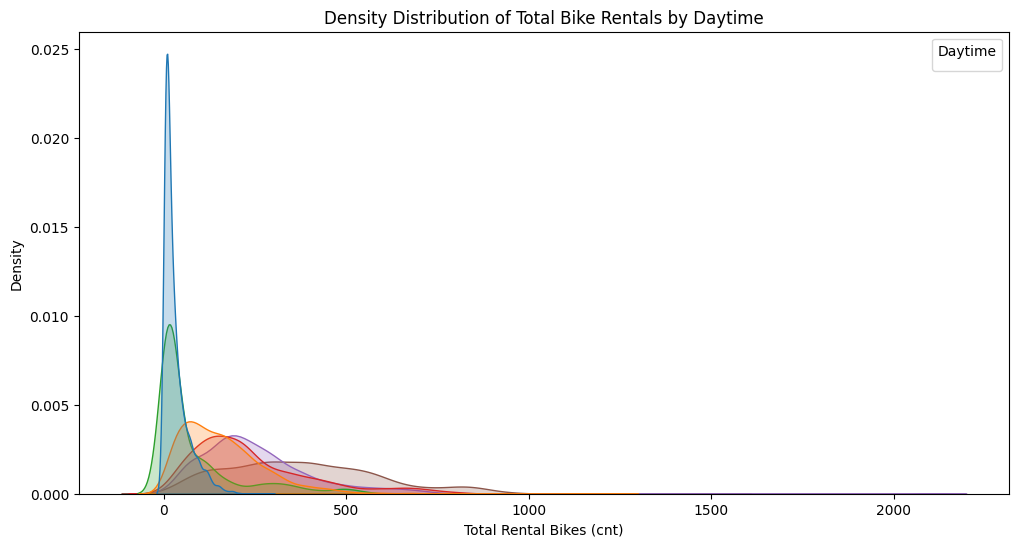

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Hour.csv')

# Create a daytime indicator based on hour
def categorize_daytime(hour):
    if 0 <= hour < 4:
        return 'Midnight'
    elif 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Noon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create the 'daytime' column
df['daytime'] = df['hr'].apply(categorize_daytime)

# Plot density distribution for the count of total rental bikes (cnt) by daytime
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='cnt', hue='daytime', common_norm=False, fill=True)
plt.title('Density Distribution of Total Bike Rentals by Daytime')
plt.xlabel('Total Rental Bikes (cnt)')
plt.ylabel('Density')
plt.legend(title='Daytime')
plt.show()


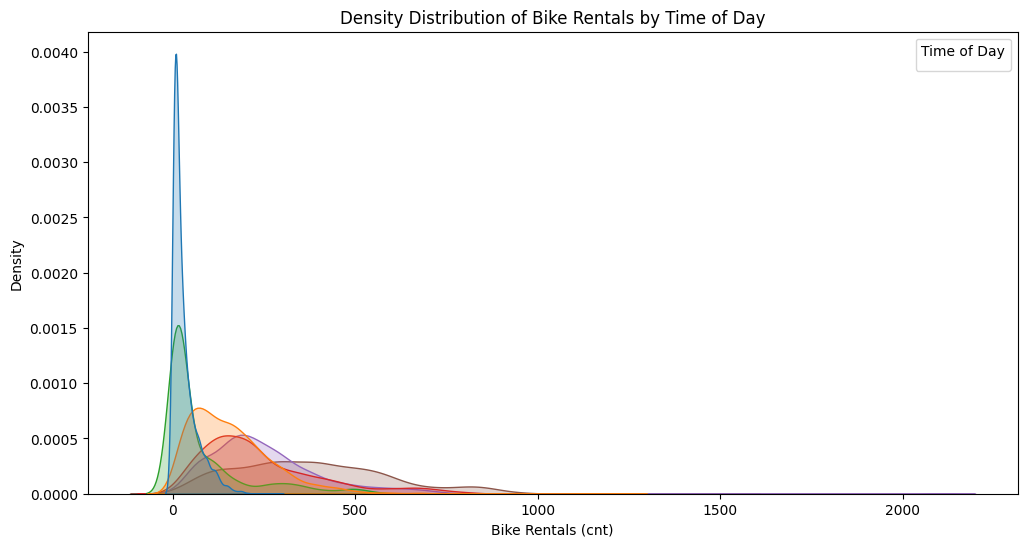

Average Bike Rentals by Time of Day:
time_of_day
Evening          379.665814
Noon             250.771449
Morning          239.579333
Night            160.298480
Early Morning     80.256762
Midnight          30.718024
Name: cnt, dtype: float64


In [ ]:
# Step 1: Define a function to categorize each hour into specified time intervals
def categorize_time_of_day(hour):
    if 0 <= hour < 4:
        return 'Midnight'
    elif 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Noon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new 'time_of_day' column
data['time_of_day'] = data['hr'].apply(categorize_time_of_day)

# Display the first few rows to verify the new column
data[['hr', 'time_of_day']].head()

# Step 2: Plot Density Distribution of Bike Rentals (cnt) by Time of Day
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='cnt', hue='time_of_day', fill=True)
plt.title('Density Distribution of Bike Rentals by Time of Day')
plt.xlabel('Bike Rentals (cnt)')
plt.ylabel('Density')
plt.legend(title='Time of Day')
plt.show()

# Step 3: Calculate and display the mean bike rentals for each time of day to find the peak traffic
mean_bike_rentals = data.groupby('time_of_day')['cnt'].mean().sort_values(ascending=False)
print("Average Bike Rentals by Time of Day:")
print(mean_bike_rentals)


Counts of each category in 'weathersit':
weathersit
1.0    11091
2.0     4427
3.0     1378
4.0        3
Name: count, dtype: int64

Percentage of each category in 'weathersit':
weathersit
1.0    63.818402
2.0    25.473272
3.0     7.929110
4.0     0.017262
Name: count, dtype: float64


<ipython-input-50-e69152d0121c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weathersit', data=df, palette='viridis')


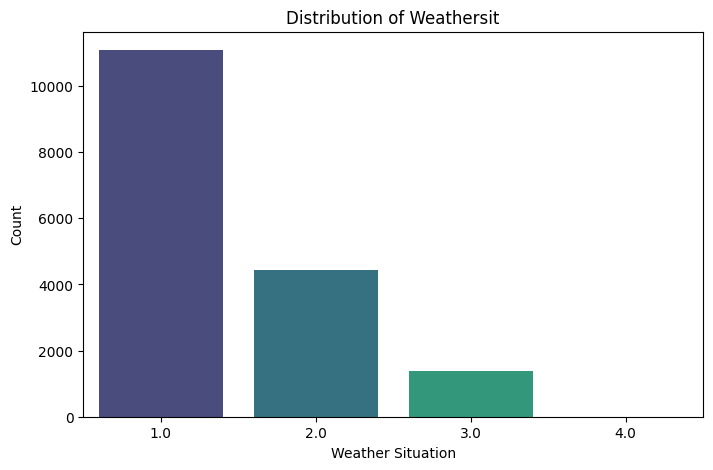

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Hour.csv')

# Check the distribution of the weathersit variable
weathersit_counts = df['weathersit'].value_counts()
weathersit_percentage = (weathersit_counts / len(df)) * 100

# Print the counts and percentages of each category
print("Counts of each category in 'weathersit':")
print(weathersit_counts)
print("\nPercentage of each category in 'weathersit':")
print(weathersit_percentage)

# Plot the distribution of the weathersit variable
plt.figure(figsize=(8, 5))
sns.countplot(x='weathersit', data=df, palette='viridis')
plt.title('Distribution of Weathersit')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.show()


Weather Situation Counts:
weathersit
1.0    11091
2.0     4427
3.0     1378
4.0        3
Name: count, dtype: int64

Weather Situation Percentage:
weathersit
1.0    65.631102
2.0    26.196816
3.0     8.154329
4.0     0.017753
Name: proportion, dtype: float64


<ipython-input-13-5281601022ac>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='weathersit', palette='viridis')


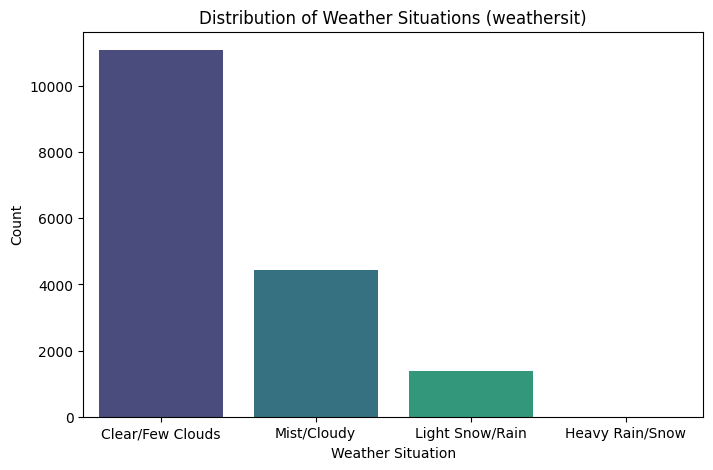

In [ ]:
# Check the distribution of the 'weathersit' variable
weathersit_counts = data['weathersit'].value_counts()
weathersit_percentage = data['weathersit'].value_counts(normalize=True) * 100

# Display the count and percentage of each weather situation
print("Weather Situation Counts:")
print(weathersit_counts)
print("\nWeather Situation Percentage:")
print(weathersit_percentage)

# Plot the distribution of the 'weathersit' variable
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='weathersit', palette='viridis')
plt.title('Distribution of Weather Situations (weathersit)')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Clear/Few Clouds', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()


<ipython-input-19-3eaa6291a4ce>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weathersit', data=data, palette='viridis')
<ipython-input-19-3eaa6291a4ce>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weathersit', data=data_balanced, palette='viridis')


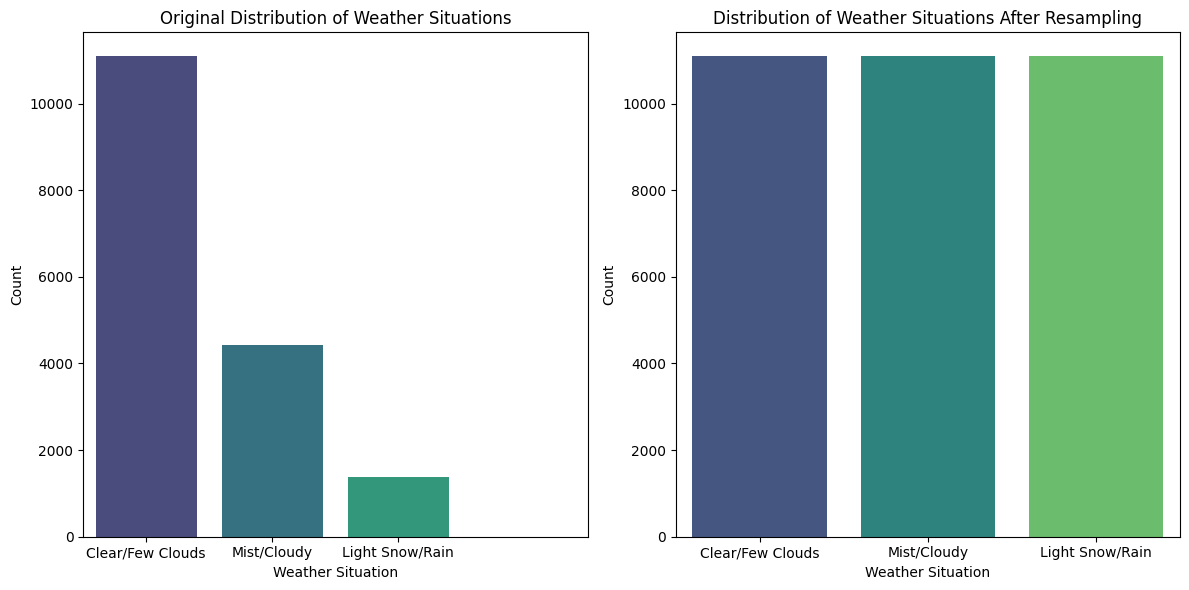

In [ ]:
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the data by 'weathersit' categories
data_majority = data[data['weathersit'] == 1]
data_minor_2 = data[data['weathersit'] == 2]
data_minor_3 = data[data['weathersit'] == 3]

# Oversample the minority classes to match the majority class size
data_minor_2_upsampled = resample(data_minor_2, replace=True, n_samples=len(data_majority), random_state=42)
data_minor_3_upsampled = resample(data_minor_3, replace=True, n_samples=len(data_majority), random_state=42)

# Combine the upsampled minority data with the majority data
data_balanced = pd.concat([data_majority, data_minor_2_upsampled, data_minor_3_upsampled])

# Plot the distribution of 'weathersit' before and after resampling
plt.figure(figsize=(12, 6))

# Original distribution plot
plt.subplot(1, 2, 1)
sns.countplot(x='weathersit', data=data, palette='viridis')
plt.title('Original Distribution of Weather Situations')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Clear/Few Clouds', 'Mist/Cloudy', 'Light Snow/Rain'])

# Resampled distribution plot
plt.subplot(1, 2, 2)
sns.countplot(x='weathersit', data=data_balanced, palette='viridis')
plt.title('Distribution of Weather Situations After Resampling')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Clear/Few Clouds', 'Mist/Cloudy', 'Light Snow/Rain'])

plt.tight_layout()
plt.show()


Balanced distribution of 'weathersit':
weathersit
1.0    11091
2.0    11091
3.0    11091
Name: count, dtype: int64


<ipython-input-51-d3e8451f46b6>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weathersit', data=df_balanced, palette='viridis')


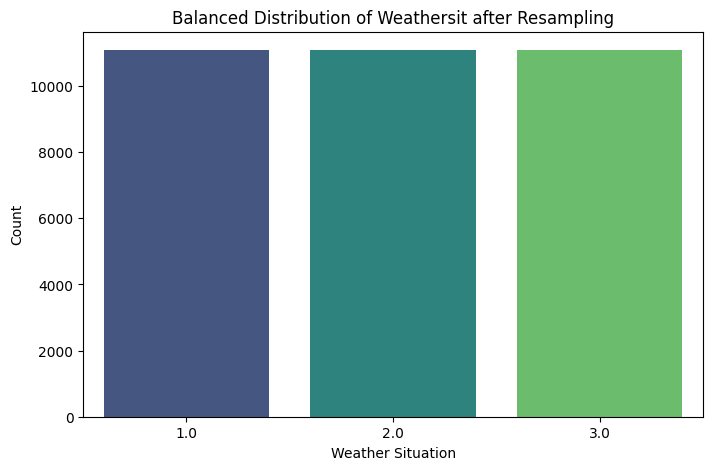

In [ ]:
# Import necessary libraries
from sklearn.utils import resample

# Separate each class
df_clear = df[df['weathersit'] == 1.0]
df_mist = df[df['weathersit'] == 2.0]
df_snow = df[df['weathersit'] == 3.0]

# Perform upsampling on mist and snow classes
df_mist_upsampled = resample(df_mist, replace=True, n_samples=len(df_clear), random_state=42)
df_snow_upsampled = resample(df_snow, replace=True, n_samples=len(df_clear), random_state=42)

# Combine the majority class with the upsampled minority classes
df_balanced = pd.concat([df_clear, df_mist_upsampled, df_snow_upsampled])

# Display the new balanced dataset distribution
print("Balanced distribution of 'weathersit':")
print(df_balanced['weathersit'].value_counts())

# Plot the balanced distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='weathersit', data=df_balanced, palette='viridis')
plt.title('Balanced Distribution of Weathersit after Resampling')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.show()


In [ ]:
# Importing necessary libraries
import pandas as pd

# Displaying descriptive statistics for relevant variables
descriptive_stats = data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()
print(descriptive_stats)


               temp         atemp           hum     windspeed        casual  \
count  16880.000000  16865.000000  16848.000000  16908.000000  16898.000000   
mean      20.383558     23.777758     62.723053     12.733865     35.750976   
std        7.891287      8.599704     19.296630      8.185318     49.424597   
min        0.820000      0.000000      0.000000      0.000000      0.000000   
25%       13.940000     16.665000     48.000000      7.001500      4.000000   
50%       20.500000     24.240000     63.000000     12.998000     17.000000   
75%       27.060000     31.060000     78.000000     16.997900     48.000000   
max       41.000000     50.000000    100.000000     56.996900    367.000000   

         registered           cnt  
count  16847.000000  16838.000000  
mean     153.560040    189.788217  
std      151.312961    183.094151  
min        0.000000      1.000000  
25%       34.000000     40.000000  
50%      115.000000    142.000000  
75%      220.000000    281.000000  


In [ ]:
# Import necessary library
import pandas as pd

# Load the dataset
df = pd.read_csv('Hour.csv')

# Select specific columns for descriptive statistics
columns_of_interest = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Display descriptive statistics for selected columns
descriptive_stats = df[columns_of_interest].describe()
print("Descriptive Statistics for Selected Columns:")
print(descriptive_stats)


Descriptive Statistics for Selected Columns:
               temp         atemp           hum     windspeed        casual  \
count  16880.000000  16865.000000  16848.000000  16908.000000  16898.000000   
mean      20.383558     23.777758     62.723053     12.733865     35.750976   
std        7.891287      8.599704     19.296630      8.185318     49.424597   
min        0.820000      0.000000      0.000000      0.000000      0.000000   
25%       13.940000     16.665000     48.000000      7.001500      4.000000   
50%       20.500000     24.240000     63.000000     12.998000     17.000000   
75%       27.060000     31.060000     78.000000     16.997900     48.000000   
max       41.000000     50.000000    100.000000     56.996900    367.000000   

         registered           cnt  
count  16847.000000  16838.000000  
mean     153.560040    189.788217  
std      151.312961    183.094151  
min        0.000000      1.000000  
25%       34.000000     40.000000  
50%      115.000000    142.

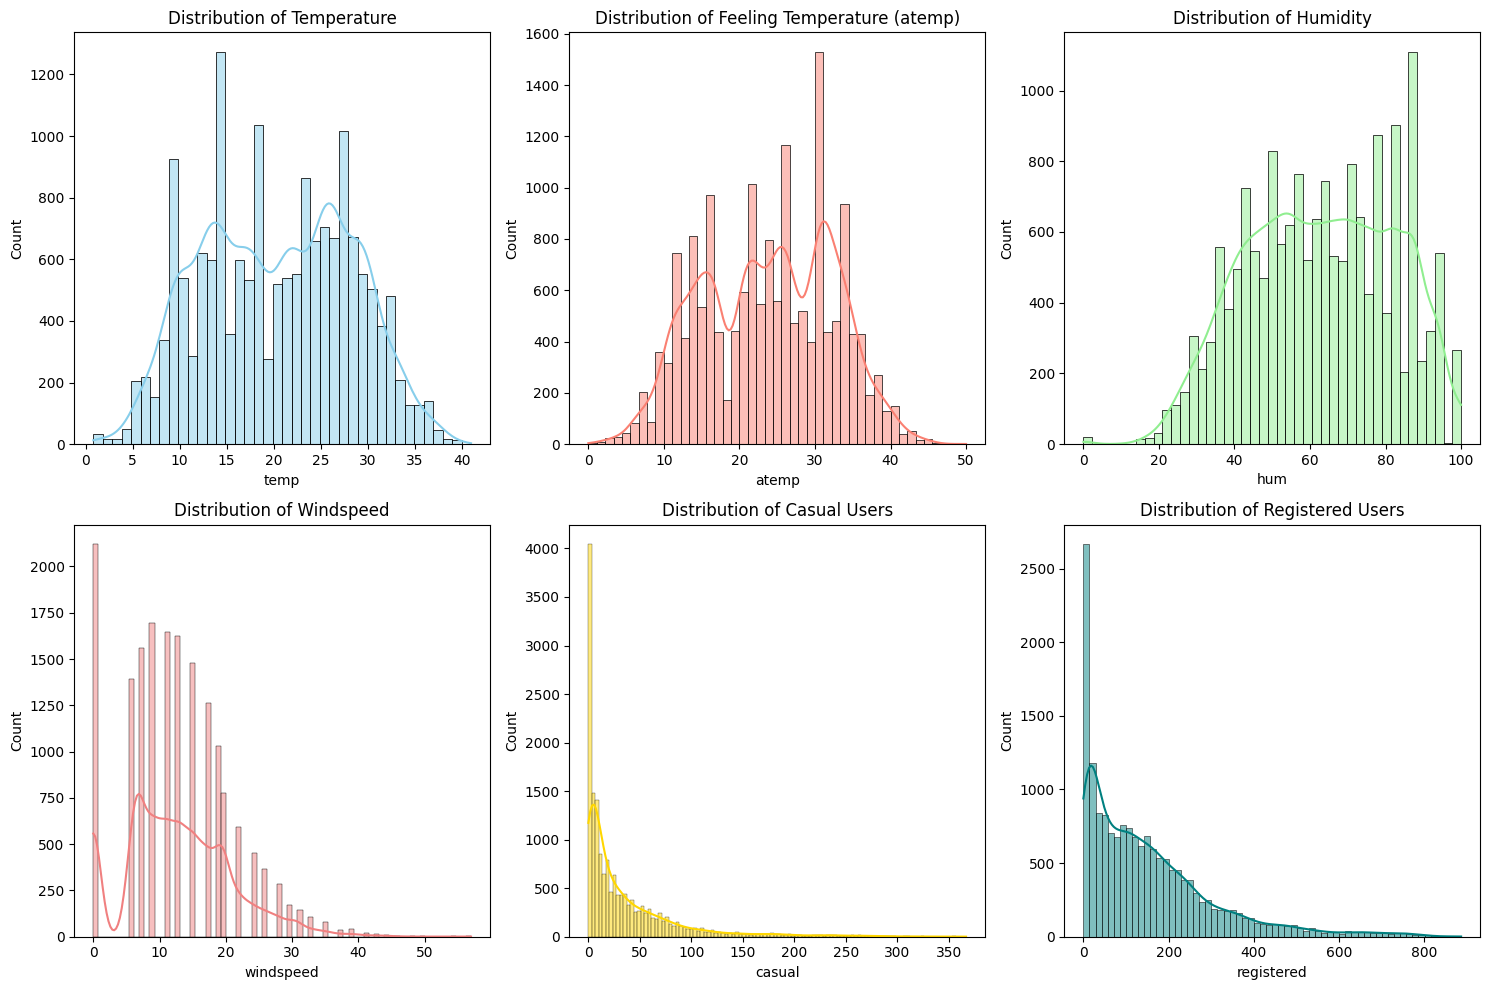

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of key variables
plt.figure(figsize=(15, 10))

# Temperature
plt.subplot(2, 3, 1)
sns.histplot(data['temp'], kde=True, color='skyblue')
plt.title('Distribution of Temperature')

# Feeling Temperature
plt.subplot(2, 3, 2)
sns.histplot(data['atemp'], kde=True, color='salmon')
plt.title('Distribution of Feeling Temperature (atemp)')

# Humidity
plt.subplot(2, 3, 3)
sns.histplot(data['hum'], kde=True, color='lightgreen')
plt.title('Distribution of Humidity')

# Windspeed
plt.subplot(2, 3, 4)
sns.histplot(data['windspeed'], kde=True, color='lightcoral')
plt.title('Distribution of Windspeed')

# Casual Users
plt.subplot(2, 3, 5)
sns.histplot(data['casual'], kde=True, color='gold')
plt.title('Distribution of Casual Users')

# Registered Users
plt.subplot(2, 3, 6)
sns.histplot(data['registered'], kde=True, color='teal')
plt.title('Distribution of Registered Users')

plt.tight_layout()
plt.show()


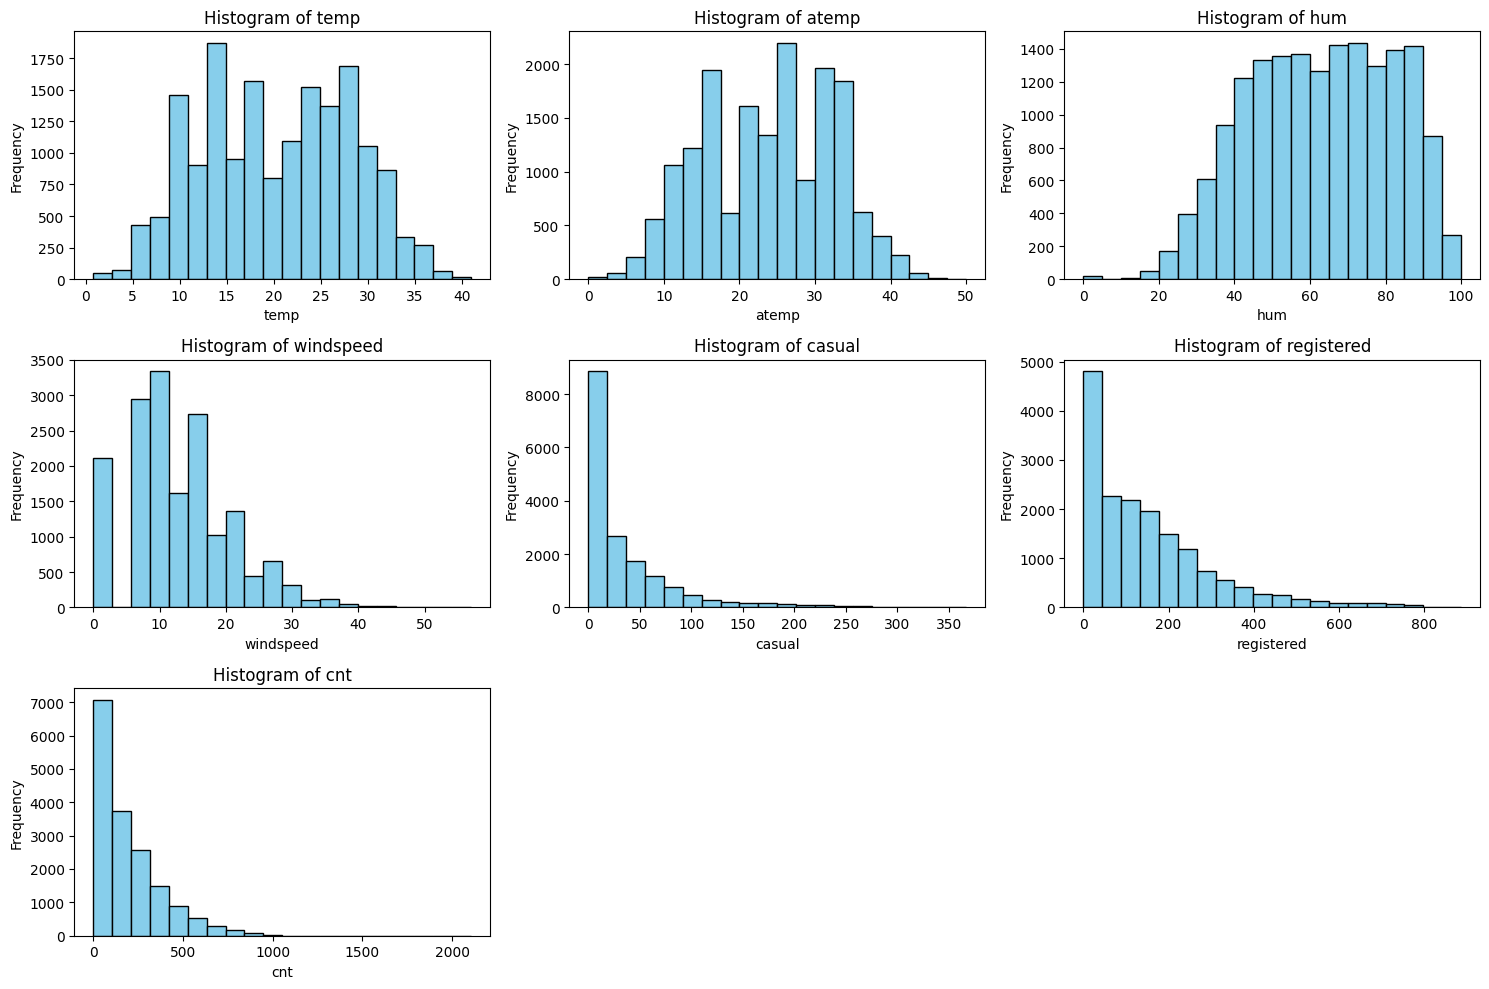

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Hour.csv')

# Select columns of interest
columns_of_interest = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Generate histograms for each selected column
plt.figure(figsize=(15, 10))  # Set the figure size for better readability

for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid for plots
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


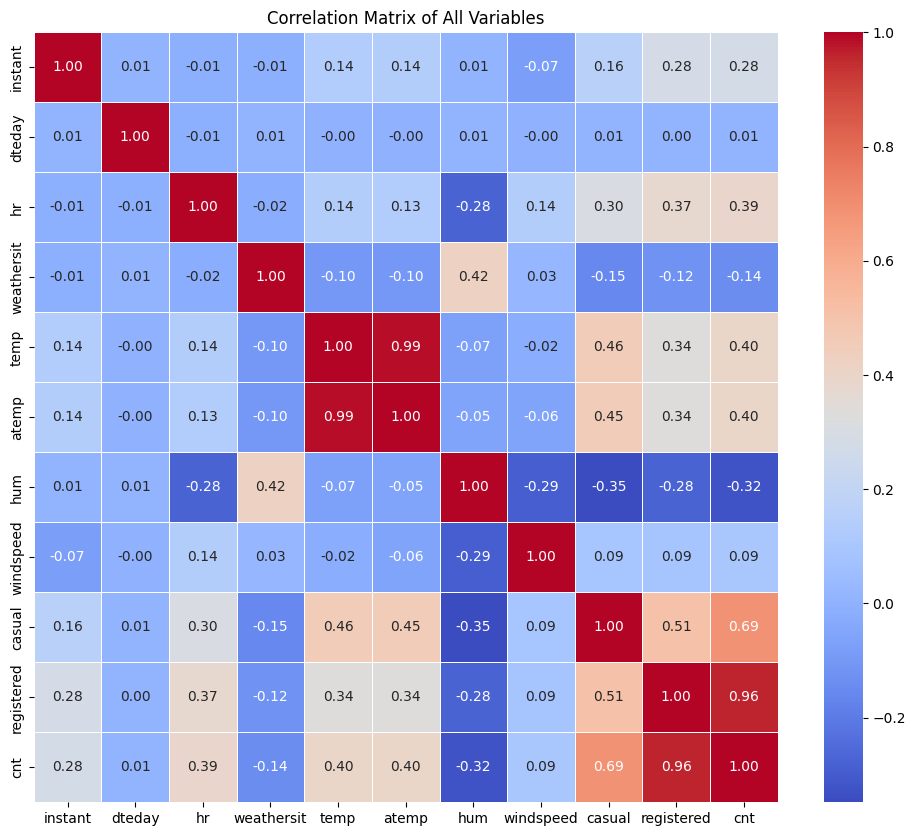

In [ ]:
# Calculate the correlation matrix for all variables
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of All Variables")
plt.show()


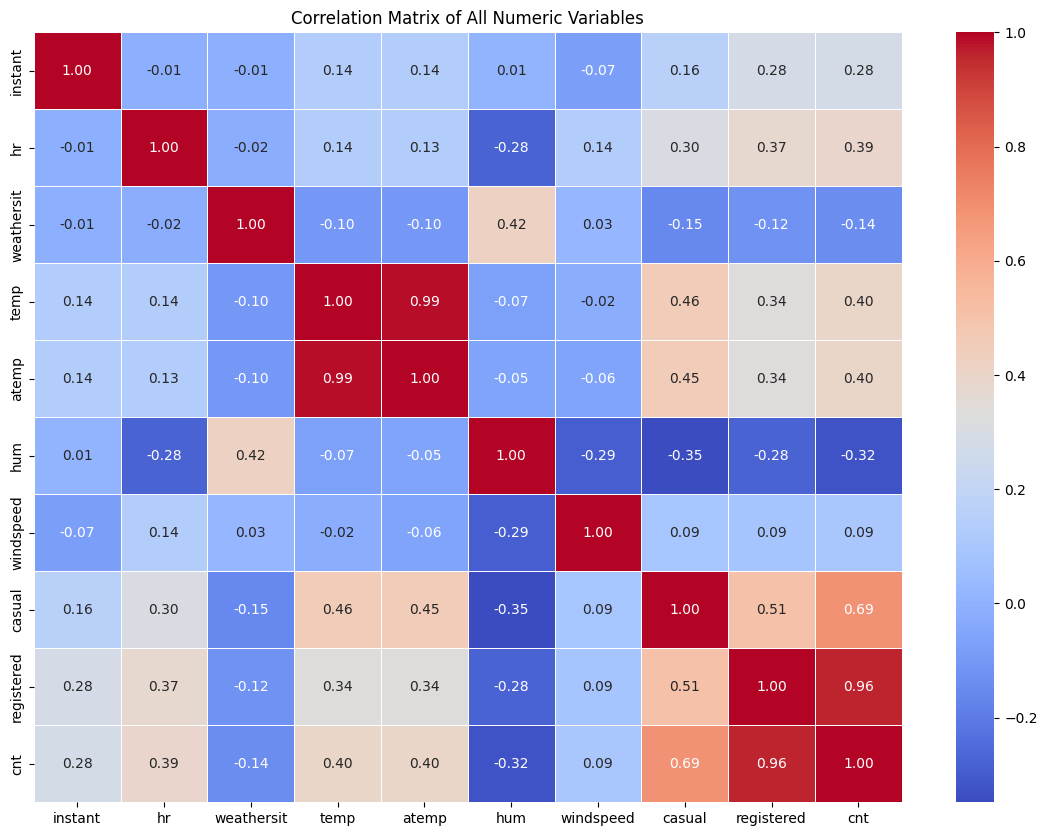

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Hour.csv')

# Calculate the correlation matrix for all numeric variables
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of All Numeric Variables')
plt.show()



<ipython-input-32-ba7511015a1d>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_trend.index, y=seasonal_trend.values, palette="coolwarm")


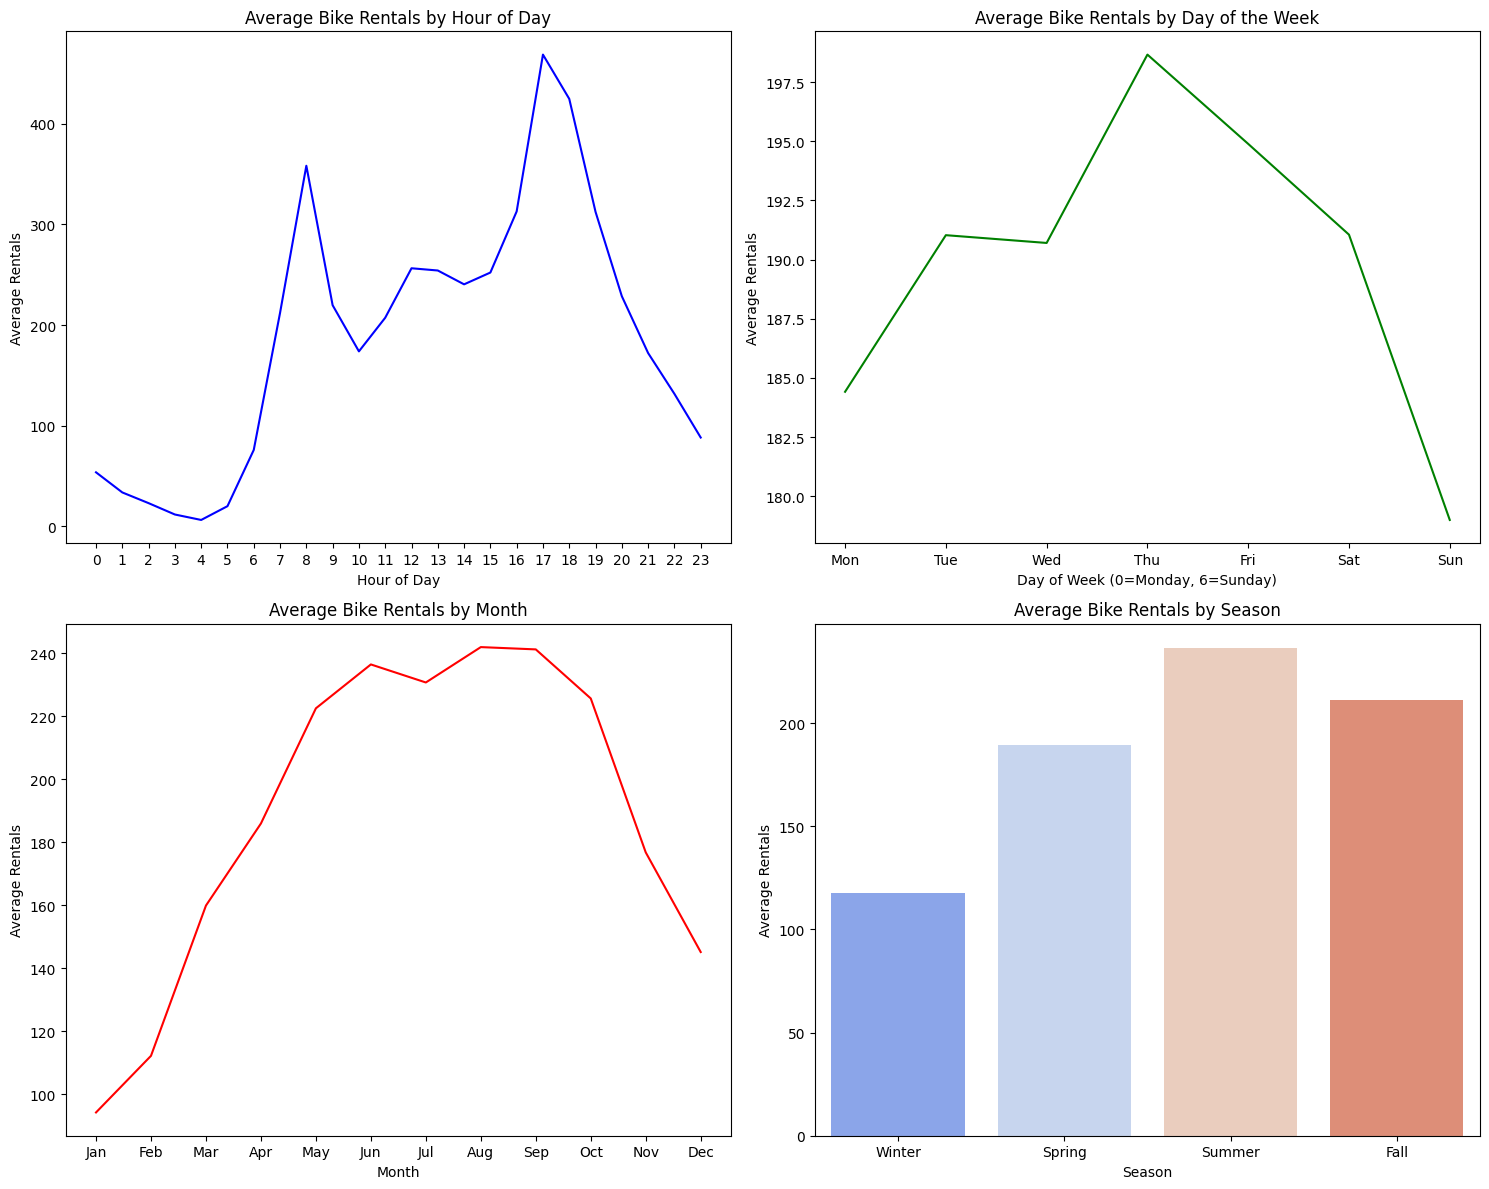

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('Hour.csv')

# Create additional time-based columns
data['dteday'] = pd.to_datetime(data['dteday'])
data['day_of_week'] = data['dteday'].dt.dayofweek  # 0=Monday, 6=Sunday
data['month'] = data['dteday'].dt.month
data['season'] = data['month'].apply(lambda month: 'Winter' if month in [12, 1, 2]
                                                    else 'Spring' if month in [3, 4, 5]
                                                    else 'Summer' if month in [6, 7, 8]
                                                    else 'Fall')

# Calculate average rentals per each time-based variable
hourly_trend = data.groupby('hr')['cnt'].mean()
weekly_trend = data.groupby('day_of_week')['cnt'].mean()
monthly_trend = data.groupby('month')['cnt'].mean()
seasonal_trend = data.groupby('season')['cnt'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Plot all time-based trends in a single figure
plt.figure(figsize=(15, 12))

# Hourly Trend
plt.subplot(2, 2, 1)
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values, color="b")
plt.title('Average Bike Rentals by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))

# Weekly Trend
plt.subplot(2, 2, 2)
sns.lineplot(x=weekly_trend.index, y=weekly_trend.values, color="g")
plt.title('Average Bike Rentals by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Monthly Trend
plt.subplot(2, 2, 3)
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, color="r")
plt.title('Average Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Seasonal Trend
plt.subplot(2, 2, 4)
sns.barplot(x=seasonal_trend.index, y=seasonal_trend.values, palette="coolwarm")
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')

plt.tight_layout()
plt.show()


<ipython-input-57-195d23673e40>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rentals_season.index, y=avg_rentals_season.values, palette='coolwarm')


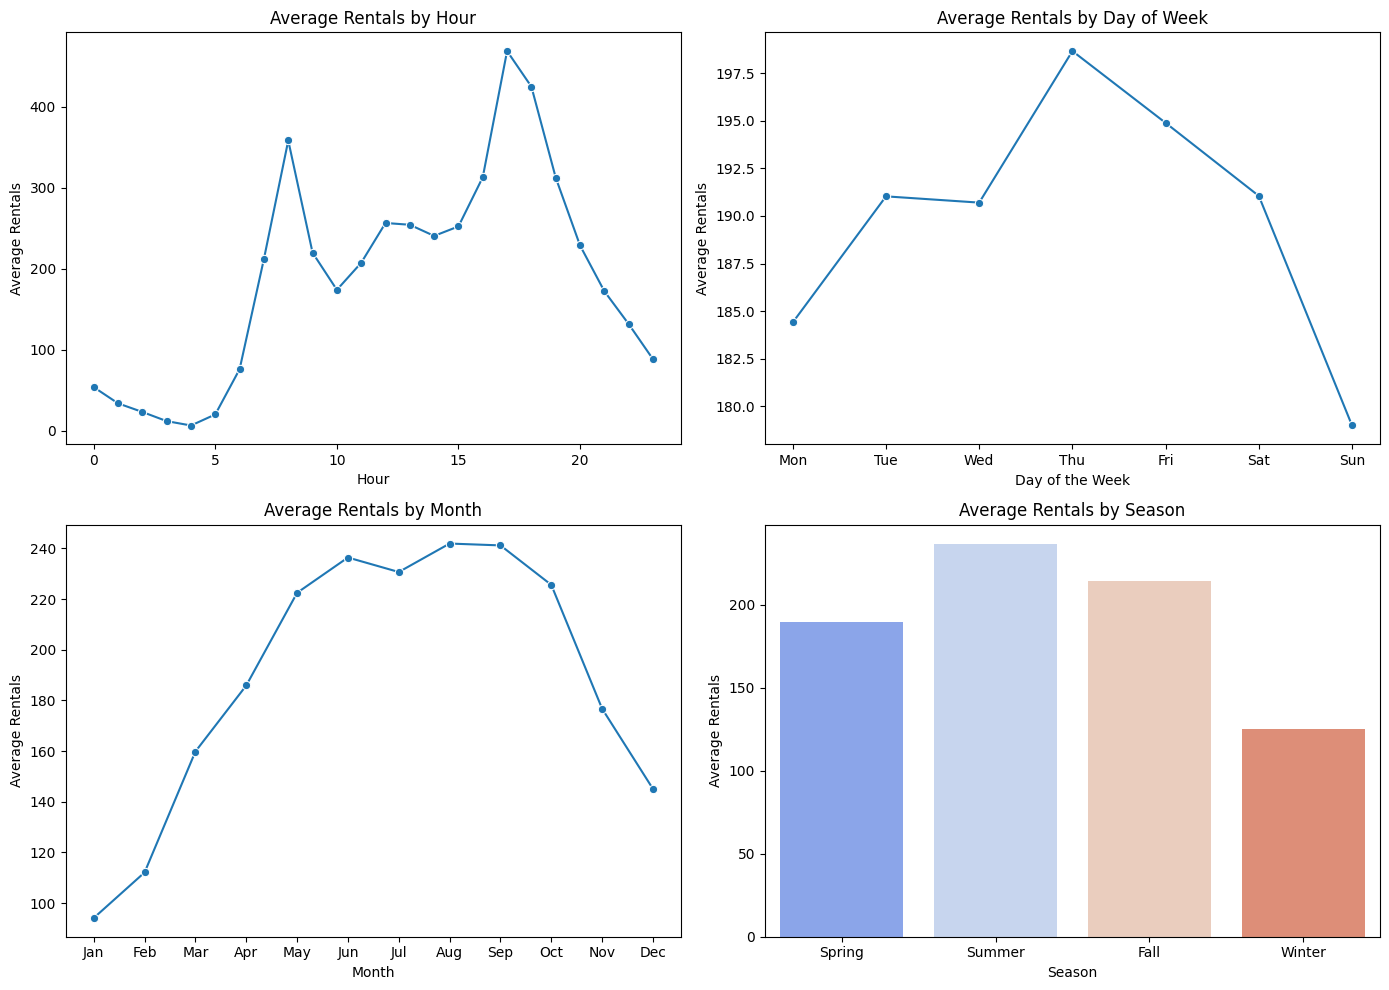

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Hour.csv')

# Convert the date column to datetime format and extract day, month, and season
df['dteday'] = pd.to_datetime(df['dteday'])
df['day'] = df['dteday'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['dteday'].dt.month

# Define seasons based on months
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['season'] = df['month'].apply(get_season)

# Calculate average rentals for each hour, day, month, and season
avg_rentals_hour = df.groupby('hr')['cnt'].mean()
avg_rentals_day = df.groupby('day')['cnt'].mean()
avg_rentals_month = df.groupby('month')['cnt'].mean()
avg_rentals_season = df.groupby('season')['cnt'].mean().reindex(['Spring', 'Summer', 'Fall', 'Winter'])

# Plotting
plt.figure(figsize=(14, 10))

# Hourly rentals (line plot)
plt.subplot(2, 2, 1)
sns.lineplot(x=avg_rentals_hour.index, y=avg_rentals_hour.values, marker='o')
plt.title('Average Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rentals')

# Weekly rentals (line plot)
plt.subplot(2, 2, 2)
sns.lineplot(x=avg_rentals_day.index, y=avg_rentals_day.values, marker='o')
plt.title('Average Rentals by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rentals')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Monthly rentals (line plot)
plt.subplot(2, 2, 3)
sns.lineplot(x=avg_rentals_month.index, y=avg_rentals_month.values, marker='o')
plt.title('Average Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Seasonal rentals (bar plot)
plt.subplot(2, 2, 4)
sns.barplot(x=avg_rentals_season.index, y=avg_rentals_season.values, palette='coolwarm')
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')

# Adjust layout
plt.tight_layout()
plt.show()


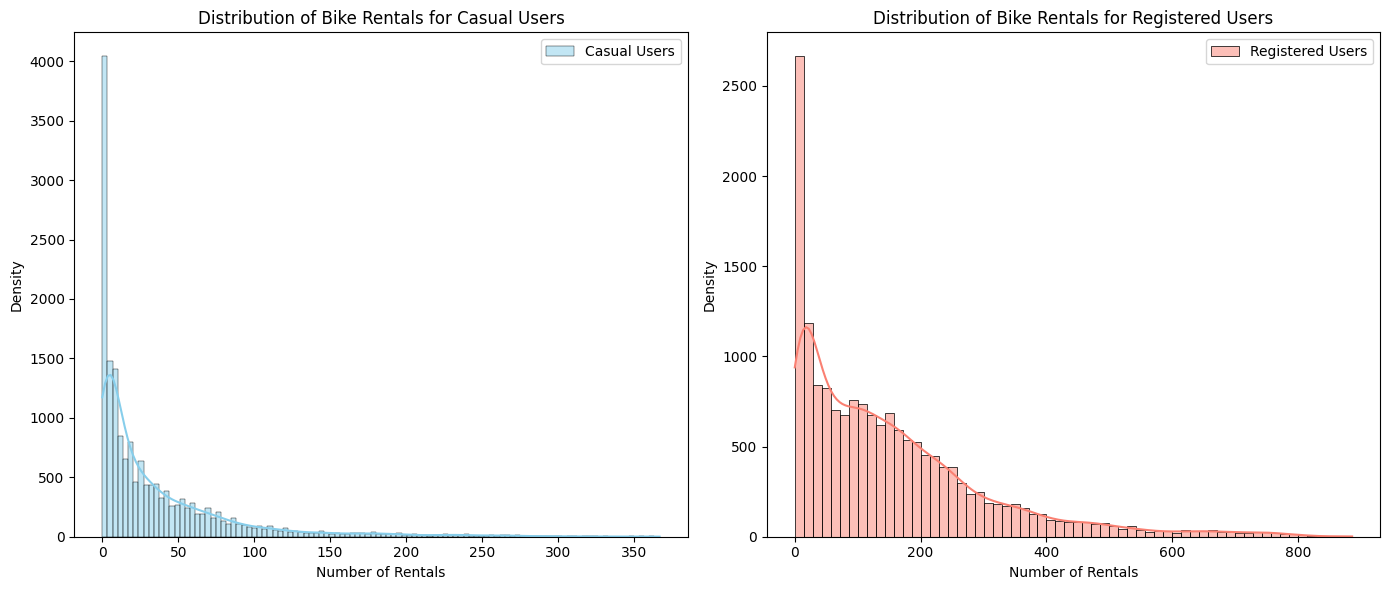

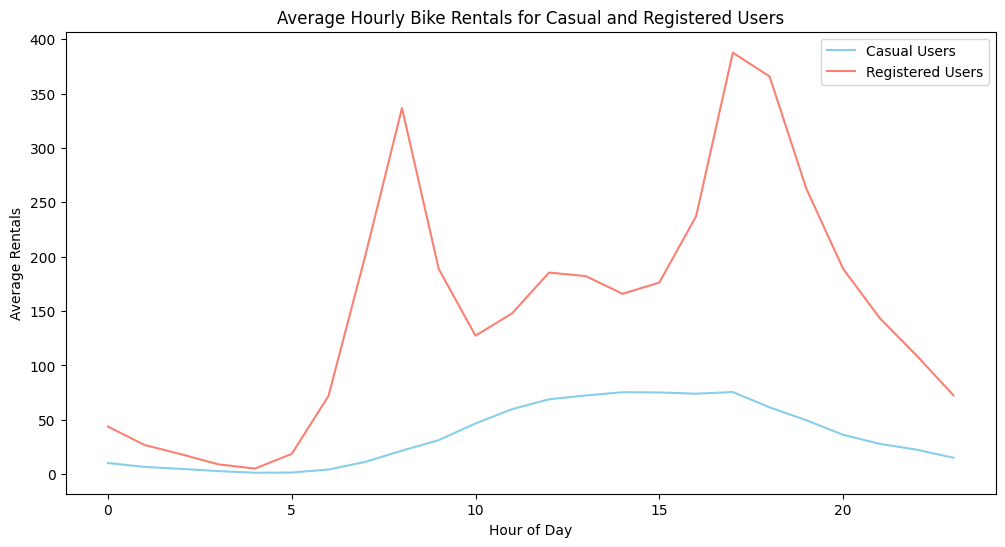

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of bike rentals for casual and registered users
plt.figure(figsize=(14, 6))

# Subplot 1: Distribution of Casual Users
plt.subplot(1, 2, 1)
sns.histplot(data['casual'], kde=True, color='skyblue', label='Casual Users')
plt.title('Distribution of Bike Rentals for Casual Users')
plt.xlabel('Number of Rentals')
plt.ylabel('Density')
plt.legend()

# Subplot 2: Distribution of Registered Users
plt.subplot(1, 2, 2)
sns.histplot(data['registered'], kde=True, color='salmon', label='Registered Users')
plt.title('Distribution of Bike Rentals for Registered Users')
plt.xlabel('Number of Rentals')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate average rentals by hour for casual and registered users
hourly_casual = data.groupby('hr')['casual'].mean()
hourly_registered = data.groupby('hr')['registered'].mean()

# Plot the hourly rental pattern for both casual and registered users
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_casual.index, y=hourly_casual.values, label='Casual Users', color='skyblue')
sns.lineplot(x=hourly_registered.index, y=hourly_registered.values, label='Registered Users', color='salmon')
plt.title('Average Hourly Bike Rentals for Casual and Registered Users')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.legend()
plt.show()


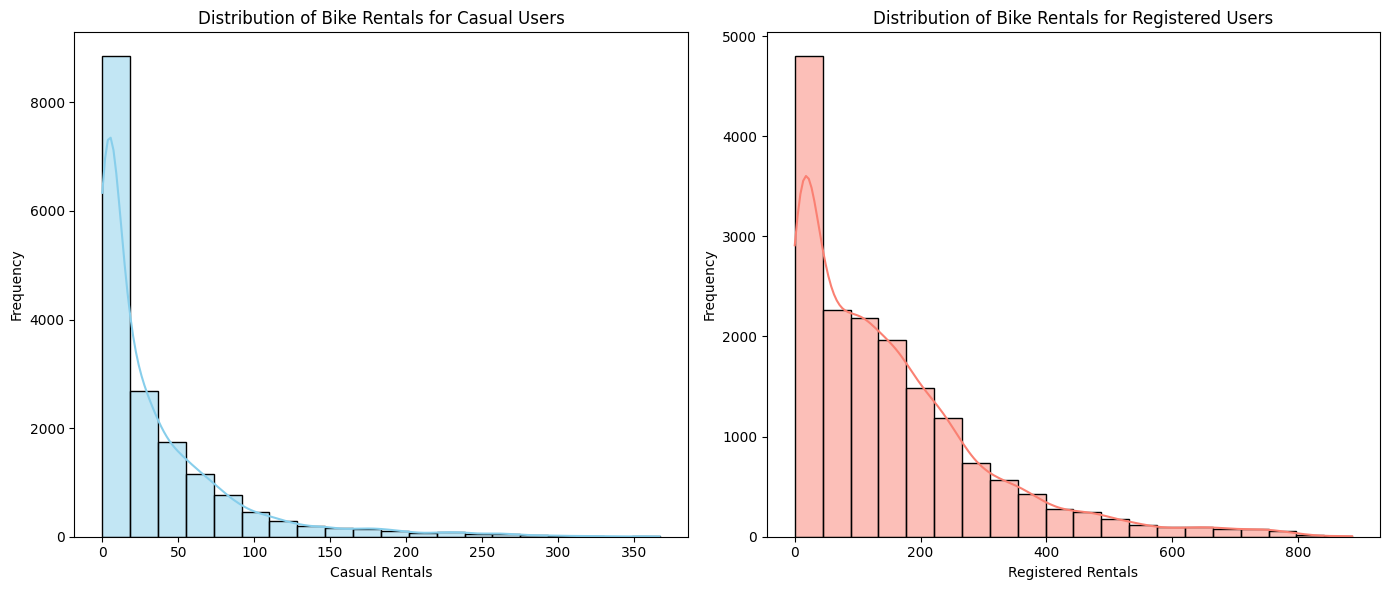

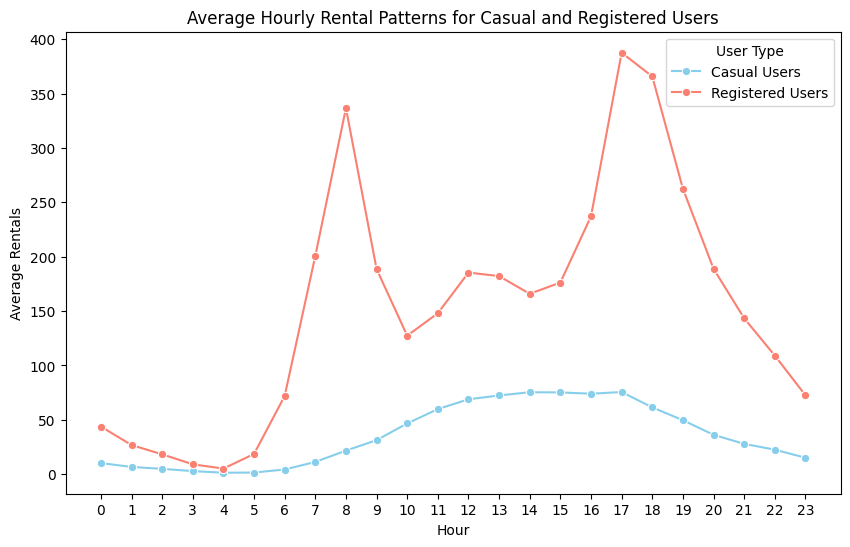

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Hour.csv')

# Plot the distribution of bike rentals for casual and registered users side by side
plt.figure(figsize=(14, 6))

# Distribution plot for casual users
plt.subplot(1, 2, 1)
sns.histplot(df['casual'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Bike Rentals for Casual Users')
plt.xlabel('Casual Rentals')
plt.ylabel('Frequency')

# Distribution plot for registered users
plt.subplot(1, 2, 2)
sns.histplot(df['registered'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Bike Rentals for Registered Users')
plt.xlabel('Registered Rentals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate average hourly rentals for casual and registered users
avg_hourly_casual = df.groupby('hr')['casual'].mean()
avg_hourly_registered = df.groupby('hr')['registered'].mean()

# Plot average hourly rental patterns
plt.figure(figsize=(10, 6))

sns.lineplot(x=avg_hourly_casual.index, y=avg_hourly_casual.values, marker='o', label='Casual Users', color='skyblue')
sns.lineplot(x=avg_hourly_registered.index, y=avg_hourly_registered.values, marker='o', label='Registered Users', color='salmon')

plt.title('Average Hourly Rental Patterns for Casual and Registered Users')
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.legend(title='User Type')
plt.xticks(range(0, 24))  # Ensure all hours are shown on the x-axis
plt.show()
